# Actividad 6. Reto Final

In [38]:
#Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

## Carga y visualización de Archivos

In [39]:
#Carga de archivos
mex = pd.read_csv("DF_Mexico.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mex.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,3,7,['phone'],t,f,NaN,Coyoacán,NaN,19.35353,-99.16299,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,19,49,324,2023-03-30,21,0,0,2014-01-03,2018-06-24,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,NaN,3,3,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,NaN,19.35358,-99.16948,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,11,41,71,346,2023-03-30,61,1,0,2014-01-01,2022-11-04,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,4,4,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,NaN,19.44180,-99.18402,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,NaN,t,0,0,0,87,2023-03-29,39,2,0,2012-10-31,2022-12-21,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-2

In [40]:
mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

### Valores Nulos

#### Visualización

In [41]:
mex.isnull().sum().sum()

189609

In [42]:
mex.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                1
description                                       928
neighborhood_overview                            9079
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    5172
host_about                                      10664
host_response_time                               3091
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

Tratamiento de Nulos
* String
    * "No Information About"
        * name
        * description
        * neighborhood_overview
        * host_location
        * host_about
        * host_response_time
        * host_neighbourhood
        * neighbourhood
        * bathrooms_text
        * review_scores_value
    * "00/00/0000"
        * first_review
        * last_review
    * "W0"
        * host_is_superhost


* Mediana
    * bedrooms
    * beds
    * minimum_minimum_nights
    * maximum_minimum_nights
    * minimum_maximum_nights
    * maximum_maximum_nights


* Media
    * maximum_maximum_nights
    * maximum_nights_avg_ntm
    * review_scores_rating
    * review_scores_accuracy
    * review_scores_cleanliness
    * review_scores_checkin
    * review_scores_communication
    * review_scores_location
    * review_scores_value
    * reviews_per_month
    * host_response_rate
    * host_acceptance_rate


* Eliminar columnas
    * neighbourhood_group_cleansed
    * bathrooms
    * calendar_updated
    * license

In [43]:
#Copia de Data Frame
mex2 = mex.copy()

In [44]:
#String 
    #No info
columnas_rellenar_no_info = ["name", "description", "neighborhood_overview", "host_location", "host_about", "host_response_time", "host_neighbourhood", "neighbourhood", "host_response_rate", "host_acceptance_rate", "bathrooms_text", "review_scores_value"]
mex2[columnas_rellenar_no_info] = mex2[columnas_rellenar_no_info].fillna("No information about")

In [45]:
#String
    #00/00/0000
mex2["first_review"] = mex2["first_review"].fillna("00/00/0000")
mex2["last_review"] = mex2["last_review"].fillna("00/00/0000")

In [46]:
#String 
    #Clave
mex2["host_is_superhost"] = mex2["host_is_superhost"].fillna("W0")

In [47]:
#Verificar nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost           

In [48]:
#Mediana
columnas_rellenar_mediana = ["bedrooms", "beds", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"]
mex2[columnas_rellenar_mediana] = mex2[columnas_rellenar_mediana].fillna(mex[columnas_rellenar_mediana].median())

In [49]:
#Verificamos nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost           

In [50]:
#Media
columnas_rellenar_media = ["maximum_maximum_nights", "maximum_nights_avg_ntm", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "minimum_nights_avg_ntm"]
mex2[columnas_rellenar_media] = mex2[columnas_rellenar_media].fillna(mex[columnas_rellenar_media].mean())

In [51]:
#Verificamos nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost           

In [52]:
#Eliminar columnas
    #neighbourhood_group_cleansed
    #bathrooms
    #calendar_updated
    #license

mex2 = mex2.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "license"], axis=1)

In [53]:
#Verificamos nulos
mex2.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [54]:
#Verificamos nulos completos
mex2.isnull().sum().sum()

0

### Valores atípicos

#### División de cualitativos y cuantitativos
 22  host_listings_count                             
 23  host_total_listings_count                       

 33  accommodates                                   

 35  bedrooms                                       
 36  beds                                           

 39  minimum_nights                                  
 40  maximum_nights                                  
 41  minimum_minimum_nights                         
 42  maximum_minimum_nights                         
 43  minimum_maximum_nights                         
 44  maximum_maximum_nights                         
 45  minimum_nights_avg_ntm                         
 46  maximum_nights_avg_ntm                         

 48  availability_30                                 
 49  availability_60                                 
 50  availability_90                                 
 51  availability_365                               

 53  number_of_reviews                             
 54  number_of_reviews_ltm                         
 55  number_of_reviews_l30d                        

 58  review_scores_rating                          
 59  review_scores_accuracy                        
 60  review_scores_cleanliness                     
 61  review_scores_checkin                         
 62  review_scores_communication                   
 63  review_scores_location                        
 64  review_scores_value                           
 
 66  calculated_host_listings_count                
 67  calculated_host_listings_count_entire_homes   
 68  calculated_host_listings_count_private_rooms  
 69  calculated_host_listings_count_shared_rooms   
 70  reviews_per_month  


Price no porque no son outliers 

In [55]:
#Cuantitativas
cuan1 = mex2.iloc[ : , [22,23]] 
cuan2 = mex2.iloc[ : , [33]]
cuan3 = mex2.iloc[ : , [35,36]]
cuan4 = mex2.iloc[ : , 39:47]   
cuan5 = mex2.iloc[ : , 48:52] 
cuan6 = mex2.iloc[ : , 53:56]
cuan7 = mex2.iloc[ : , 58:64]
cuan8 = mex2.iloc[ : , 66:71]
cuanti_mex = pd.concat([cuan1, cuan2, cuan3, cuan4, cuan5, cuan6, cuan7, cuan8], axis=1)


In [70]:
columnas_a_eliminar = cuanti_mex.columns
cuali_mex = mex2.drop(columns=columnas_a_eliminar)
cuali_mex.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms_text',
       'amenities', 'price', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'review_scores_value',
       'instant_bookable'],
      dtype='object')

In [56]:
#Visualizamos info de nuevo df
cuanti_mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           24224 non-null  int64  
 1   host_total_listings_count                     24224 non-null  int64  
 2   accommodates                                  24224 non-null  int64  
 3   bedrooms                                      24224 non-null  float64
 4   beds                                          24224 non-null  float64
 5   minimum_nights                                24224 non-null  int64  
 6   maximum_nights                                24224 non-null  int64  
 7   minimum_minimum_nights                        24224 non-null  float64
 8   maximum_minimum_nights                        24224 non-null  float64
 9   minimum_maximum_nights                        24224 non-null 

#### Visualización de valores atípicos

<Figure size 1500x800 with 0 Axes>

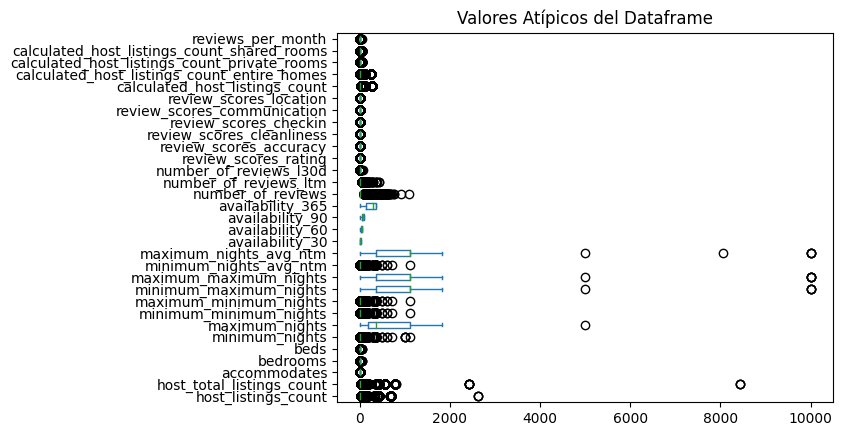

In [57]:
fig = plt.figure(figsize =(15, 8))
cuanti_mex.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

#### Tratamiento de Outliers
Por rango intercuartilico

In [58]:
#Tratamiento con desviación estándar
    #Marcamos límites
y = cuanti_mex
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count                              252.830274
host_total_listings_count                        426.203015
accommodates                                       9.933140
bedrooms                                           4.967931
beds                                               6.934289
minimum_nights                                    84.914542
maximum_nights                                  2018.371832
minimum_minimum_nights                            74.570464
maximum_minimum_nights                            75.639955
minimum_maximum_nights                          2164.914446
maximum_maximum_nights                          2164.364207
minimum_nights_avg_ntm                            74.890171
maximum_nights_avg_ntm                          2159.176276
availability_30                                   49.824183
availability_60                                  101.327447
availability_90                                  152.257190
availability_3

In [59]:
#Observamos valores atípicos del data frame
outliers_cuan_mex= cuanti_mex[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_cuan_mex.head()

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,14.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Hacemos el cambio a un nuevo data frame
cuanti_mex_limpio_out = cuanti_mex[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuanti_mex_limpio_out.head()

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,7.0,3.0,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000
1,3.0,3.0,2.0,1.0,1.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000
2,4.0,4.0,6.0,3.0,3.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000
3,1.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435
4,16.0,16.0,NaN,NaN,NaN,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.580000,4.56000,4.700000,4.870000,4.780000,4.980000,12.0,3.0,2.0,0.0,0.460000


In [61]:
#Vemos valores nulos
cuanti_mex_limpio_out.isnull().sum()

host_listings_count                             521
host_total_listings_count                       489
accommodates                                    537
bedrooms                                        299
beds                                            379
minimum_nights                                  178
maximum_nights                                    1
minimum_minimum_nights                          173
maximum_minimum_nights                          176
minimum_maximum_nights                            5
maximum_maximum_nights                            6
minimum_nights_avg_ntm                          174
maximum_nights_avg_ntm                            6
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               564
number_of_reviews_ltm                           332
number_of_re

In [64]:
#Cambiamos nuevo nulos a media
cuanti_mex_limpio_out_mean = cuanti_mex_limpio_out.copy()
cuanti_mex_limpio_out_mean = cuanti_mex_limpio_out.fillna(cuanti_mex_limpio_out.mean())
cuanti_mex_limpio_out_mean.head()

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,7.0,3.00000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000
1,3.0,3.0,2.00000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000
2,4.0,4.0,6.00000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000
3,1.0,1.0,2.00000,1.000000,1.000000,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435
4,16.0,16.0,3.06683,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.580000,4.56000,4.700000,4.870000,4.780000,4.980000,12.0,3.0,2.0,0.0,0.460000


<Figure size 1500x800 with 0 Axes>

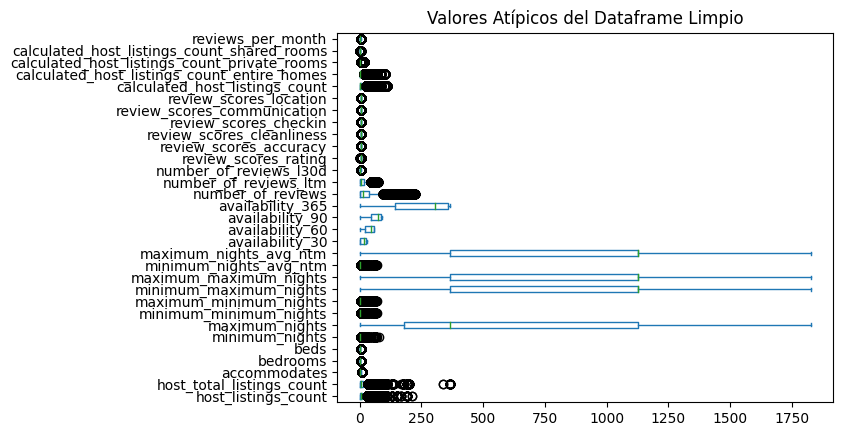

In [65]:
#Volvemos a observar en diagrama de cajas
fig = plt.figure(figsize =(15, 8))
cuanti_mex_limpio_out_mean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Limpio")
plt.show()

Juntamos los dos data frames

In [76]:
mex3 = pd.concat([cuanti_mex_limpio_out_mean, cuali_mex], axis = 1)
mex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           24224 non-null  float64
 1   host_total_listings_count                     24224 non-null  float64
 2   accommodates                                  24224 non-null  float64
 3   bedrooms                                      24224 non-null  float64
 4   beds                                          24224 non-null  float64
 5   minimum_nights                                24224 non-null  float64
 6   maximum_nights                                24224 non-null  float64
 7   minimum_minimum_nights                        24224 non-null  float64
 8   maximum_minimum_nights                        24224 non-null  float64
 9   minimum_maximum_nights                        24224 non-null 

### Extracción de Datos

In [ ]:
#a) host_acceptance_rate> 50%
#host_acceptance_rate = mex3["host_acceptance_rate"] > 50
mex3["host_acceptance_rate"].value_counts

In [ ]:
# b) Sólo los registros con categoría “superhost”
superhost = mex3[mex3["host_is_superhost"] == "t"]
superhost.head()

In [ ]:
#c) Los registros que no hallan verificado identidad “ not identity_verified”
host_identity_verified = mex3[mex3["host_identity_verified"] == "f"]
host_identity_verified.head()

In [ ]:
#d) Los registro cuyo property_type = “Private room” y “Hotel room”
private_hotel_room = mex3[(mex3["property_type"] == "Private room") | (mex3["property_type"] == "Hotel room")]
private_hotel_room.head()


In [101]:
# E) bahtroom_text

In [ ]:
# f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
# home = mex3[(mex3["price"] > 10000) & (mex3["property_type"] == "Enitre home")]
# home.head()
mex3["price"].value_counts

In [ ]:
#g) Los registros cuyo review_scores_cleanliness > 4.5
score_cleanliness = mex3[mex3["review_scores_cleanliness"] > 4.5]
score_cleanliness.head()

In [ ]:
# h) Los registros cuyo review_scores_value > 4.9
# review_scores_value =  mex3[mex3["review_scores_value"] > 4.9]
# review_scores_value.head()
# mex3["review_scores_value"].value_counts

In [ ]:
# i) Los registros cuya availability_365< 100
availability_365 =  mex3[mex3["availability_365"] < 100]
availability_365.head()

In [ ]:
# j) Los registros cuya host_response_time sea “within an hour”
host_response_time =  mex3[mex3["host_response_time"] == "within an hour" ]
host_response_time.head()

#### Visualización de datos

Porcentaje de Aceptación de acuerdo a si es un Host verificado o no

In [120]:
# Barras
    #232_type_of_store
host_acceptance_rate_vs_verified_host = freq_tbl(mex3["host_acceptance_rate"] & mex3["host_identity_verified"])
host_acceptance_rate_vs_verified_host_filtro = host_acceptance_rate_vs_verified_host[host_acceptance_rate_vs_verified_host(["frequency"]>1) (host_acceptance_rate_vs_verified_host["host_identity_verified"] == "t")]
host_acceptance_rate_vs_verified_host_index = host_acceptance_rate_vs_verified_host_filtro("host_identity_verified")
host_acceptance_rate_vs_verified_host_index.plot(kind = "bar", width = 1, figsize = (10,4))
plt.title("Tipos de tienda")
plt.xlabel("Tipo de tienda")
plt.ylabel("Frecuencia")

NameError: name 'freq_tbl' is not defined